# Régression avec les données numériques les plus correlées
Pour ce troisième et dernier notebook sur la régression, nous avons exploité uniquement les données numériques les plus corrélées au prix de vente.

In [2]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [3]:
df = pd.read_csv("data/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [42]:
num_df = df.select_dtypes(include=['int64','float64']).copy()
num_df.keys()

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [43]:
used_labels = ['LotFrontage', 'LotArea', 'YearBuilt', 'MSSubClass', 'MoSold', 'YrSold']
X = num_df[used_labels]
y=num_df['SalePrice']


In [44]:
X=X.fillna(X.mean()).reset_index()
X = X.drop("index", axis=1)

y = y.reset_index().drop("index", axis=1)

In [45]:
model = keras.Sequential()
model.add(keras.layers.Dense(6, activation='relu', input_shape=(6,)))
model.add(keras.layers.Dense(6, activation='relu'))
model.add(keras.layers.Dense(1))

model.compile(optimizer= 'adam', loss='mean_squared_error')


In [46]:
model.fit(X, y, epochs=30, callbacks= [keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/30
1460/1460 [==============================] - 0s 247us/step - loss: 39504104058.0384
Epoch 2/30
1460/1460 [==============================] - 0s 69us/step - loss: 39059438336.7014
Epoch 3/30
 640/1460 [============>.................] - ETA: 0s - loss: 37923222528.0000

c:\users\tnhaw\anaconda3\envs\myenv\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


1460/1460 [==============================] - 0s 86us/step - loss: 38521751894.2685
Epoch 4/30
1460/1460 [==============================] - 0s 90us/step - loss: 37563596025.6877
Epoch 5/30
1460/1460 [==============================] - 0s 77us/step - loss: 36024150801.5342
Epoch 6/30
1460/1460 [==============================] - 0s 89us/step - loss: 33920509087.9123
Epoch 7/30
1460/1460 [==============================] - 0s 85us/step - loss: 31188459003.7918
Epoch 8/30
1460/1460 [==============================] - 0s 88us/step - loss: 27919326053.6986
Epoch 9/30
1460/1460 [==============================] - 0s 81us/step - loss: 24353187980.2740
Epoch 10/30
1460/1460 [==============================] - 0s 85us/step - loss: 20895445626.0384
Epoch 11/30
1460/1460 [==============================] - ETA: 0s - loss: 18097717270.755 - 0s 80us/step - loss: 18097791082.6082
Epoch 12/30
1460/1460 [==============================] - 0s 86us/step - loss: 15933236801.9288
Epoch 13/30
1460/1460 [===========

In [47]:
test = pd.read_csv("test.csv")
df_prices = pd.read_csv("sample_submission.csv")

In [35]:
y_test = df_prices["SalePrice"]
X_test = test[used_labels]

In [48]:
X_test = X_test.fillna(X_test.mean()).reset_index()
X_test = X_test.drop("index", axis=1)

y_test = y_test.reset_index().drop("index", axis=1)

In [50]:
import matplotlib.pyplot as plt 

Average error : 13409.720899606822 $.
Average Price : 180921.19589041095 $.
Pourcentage d'erreur : 7.411912591894135 %.


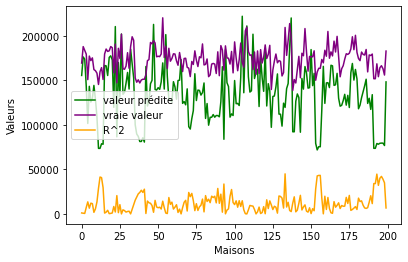

In [51]:

y_predi_test = model.predict(X_test) #on predit à partir de X_test

x=np.arange(0,len(y_test),1) # creation d'une graduation en abscisse
y_predi_test = y_predi_test.tolist() # on se retrouve avec une matrice (ce sera plus simple pour R_2)

#R_squared = ( ((y_val - y_val.mean()) ** 2).sum() - ((y_val - y_pred) ** 2).sum())/((y_val - y_val.mean()) ** 2).sum()
# (y_pred-y_val)**2/np.mean(y_val)

error_list = []
for i in range(0,len(y_test)): 
    error = ((y_predi_test[i] - y_test["SalePrice"][i])**2)/(y_test.mean())
    error_list.append(error)

print(f"Average error : {(sum(error_list)/len(error_list))[0]} $.")

mean = df['SalePrice'].mean()
print(f"Average Price : {mean} $.")

print(f"Pourcentage d'erreur : {((sum(error_list)/len(error_list))[0]/mean)*100} %.")

n = 200

plt.plot(x[:n], y_predi_test[:n], c='green', label= "valeur prédite")
plt.plot(x[:n], y_test[:n], c='purple', label= "vraie valeur")
plt.plot(x[:n], error_list[:n], c='orange', label = "R^2")
plt.xlabel("Maisons")
plt.ylabel("Valeurs")
plt.legend(loc = 'best')
plt.show();

On obtient un algorithme facile à entraîner, et des résultats qui sont en moyenne bons. On constate toutefois que la valeur prédite ne colle pas aussi précisément à la valeur réelle dans la plupart des cas.